## Home Credit Default Risk

* application_{train|test}.csv

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

* bureau.csv

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
bureau_balance.csv

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

* POS_CASH_balance.csv

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

* credit_card_balance.csv

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

* previous_application.csv

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

* installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

* HomeCredit_columns_description.csv

This file contains descriptions for the columns in the various data files.


In [1]:
import pandas as pd
import numpy as np
from math import *
import random
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns; sns.set(style="white", color_codes=True)
import os

In [2]:
risk_data = pd.read_csv("application_train.csv")

In [3]:
risk_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Total number of records
n_records = risk_data.shape[0]

#Number of records where Target is 1
n_Target1 = risk_data[risk_data['TARGET']== 1].shape[0]

#Number of records where Target is 0
n_Target0 = risk_data[risk_data['TARGET']== 0].shape[0]

#Percentage of Target 1's over Target 0
greater_percent = (n_Target1/(n_Target1+n_Target0))*100

#Print the results
print("Total number of records: {}".format(n_records))
print("Target is 1: {}".format(n_Target1))
print("Target is 0: {}".format(n_Target0))
print("Percentage of Target 1: {}%".format(greater_percent))

Total number of records: 307511
Target is 1: 24825
Target is 0: 282686
Percentage of Target 1: 8.072881945686495%


# Exploration: Missing Data (missingno package)
The nullity matrix gives you a data-dense display which lets you quickly visually pick out the missing data patterns in the dataset. Also, the sparkline on the right gives you a summary of the general shape of the data completeness and an indicator of the rows with maximum and minimum rows. missingno:[https://github.com/ResidentMario/missingno](http://)

Looks like a set of columns in the beginning and the end are mostly completely populated while a big chunk of columns in the middle are missing values heavyly

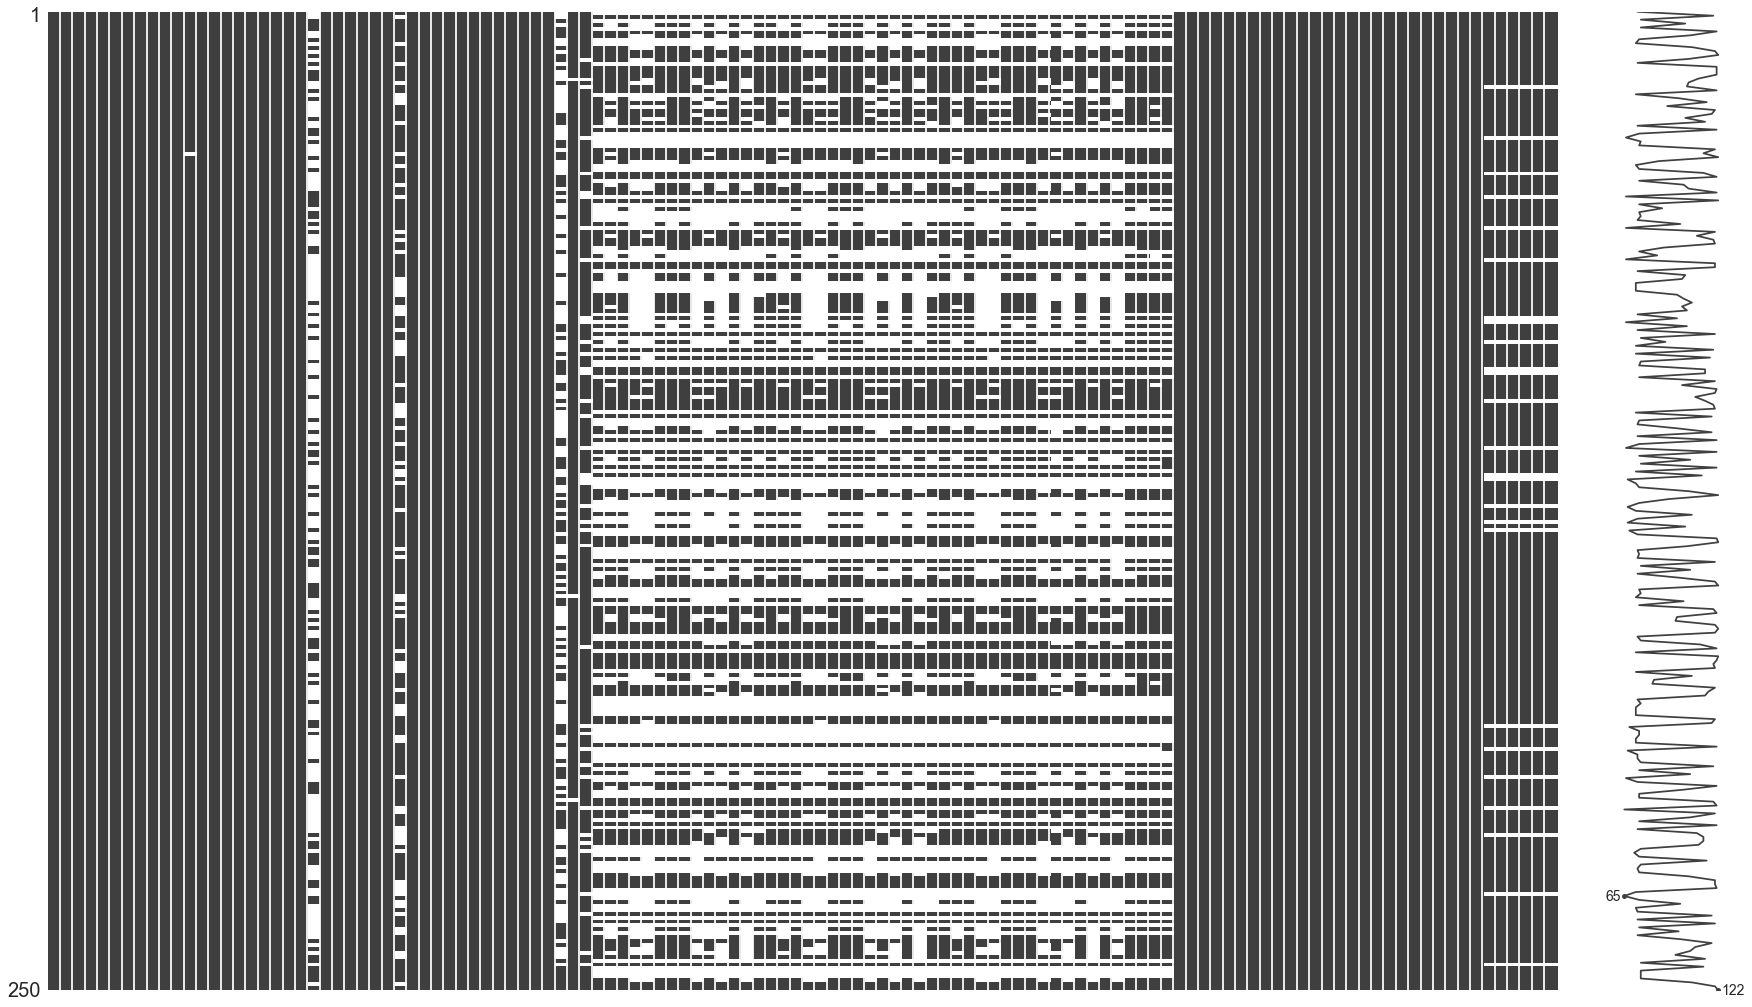

In [5]:
# msno.matrix lets us quickly visualize null values
import missingno as msno
risk_data = risk_data.replace(["nan",'NAN'], np.nan)
msno.matrix(risk_data.sample(250),  figsize=(30,18))

The missingno bar chart is a visualization of the data nullity. We log transformed the data on the y-axis to better visualize features with very large missing values.

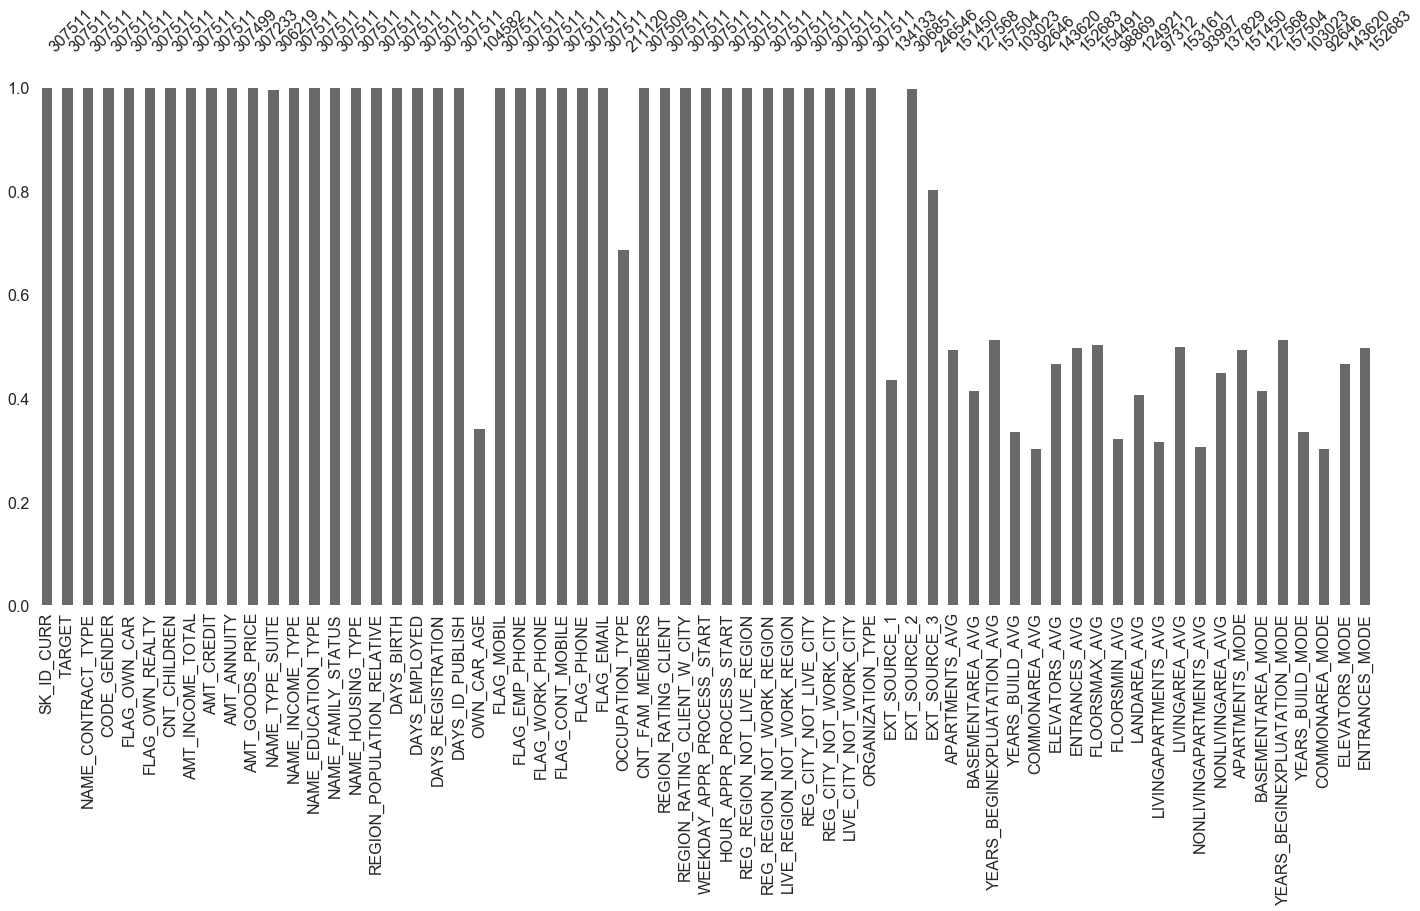

In [6]:
#Bar Part 1
msno.bar(risk_data.iloc[0:, 0:65])

A simple correlation heatmap is shown below. This map describes the degree of nullity relationship between the different features. The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1). Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed. Also, a perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.

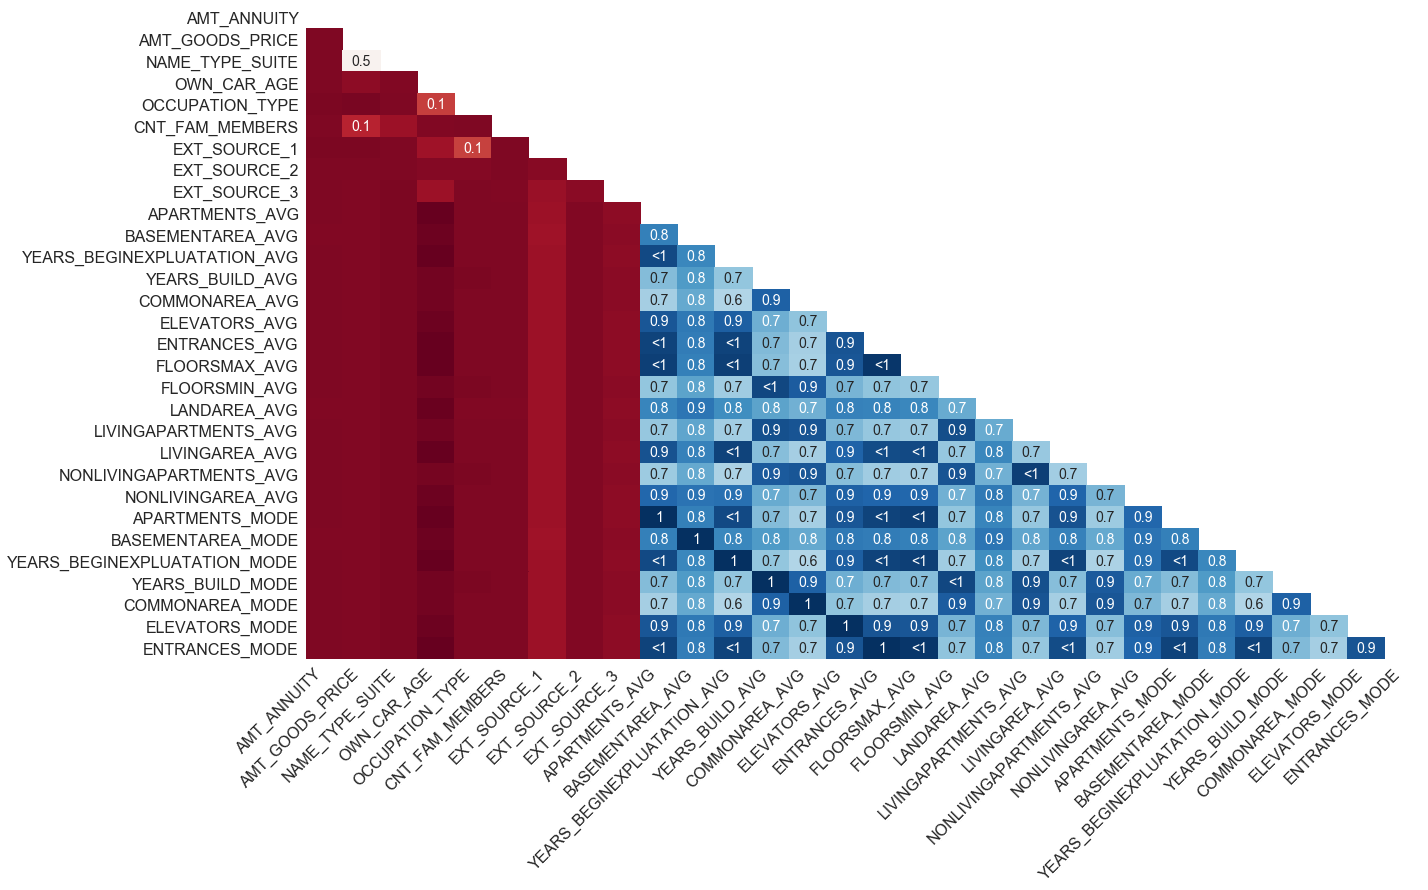

In [7]:
#Nullity correlation heatmap part 1
msno.heatmap(risk_data.iloc[0:, 0:65])

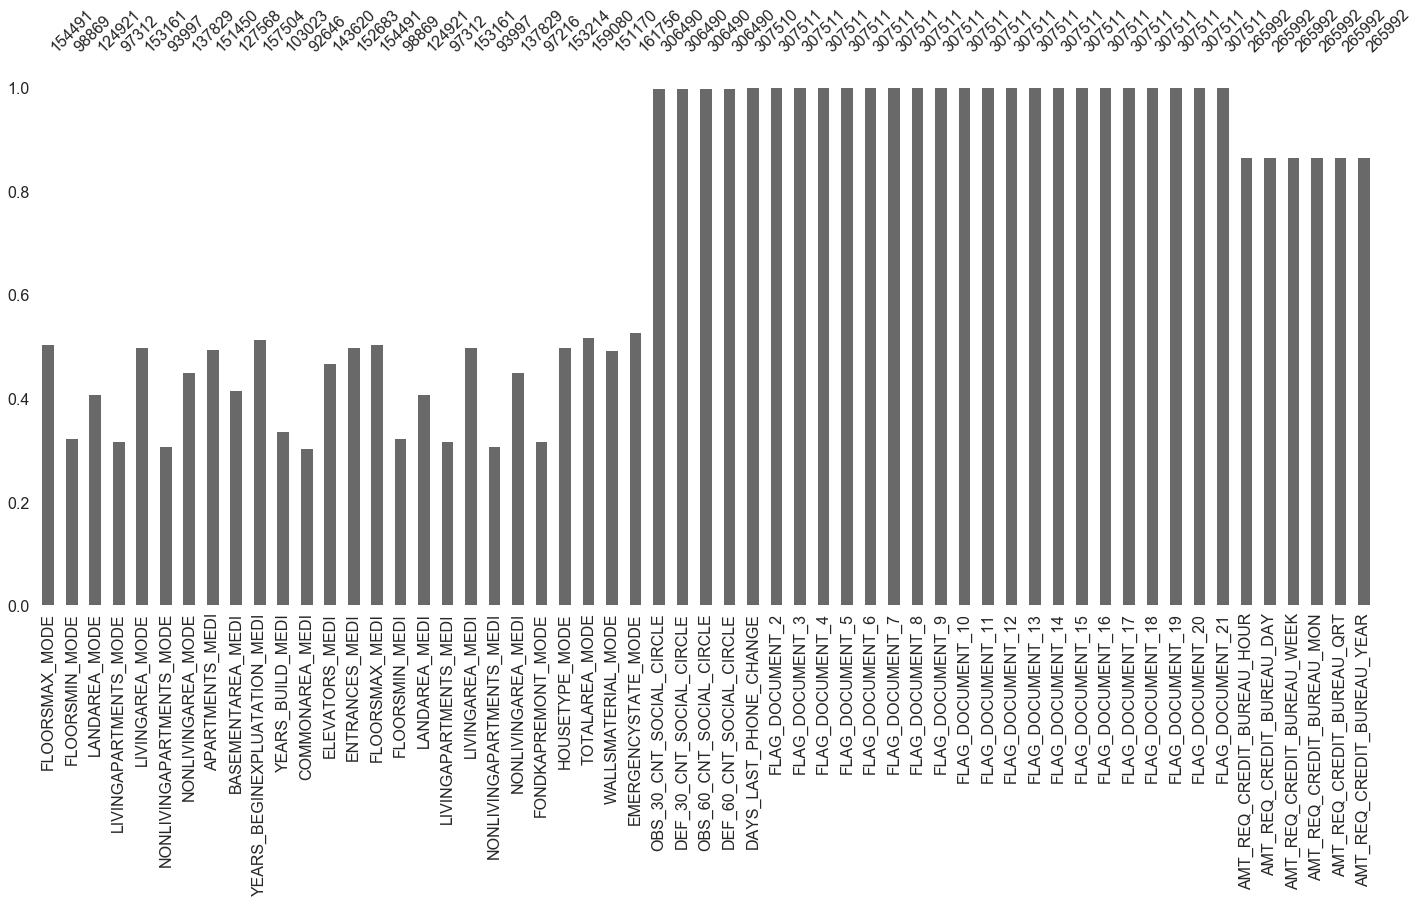

In [8]:
#Bar Part 2
msno.bar(risk_data.iloc[0:, 65:])

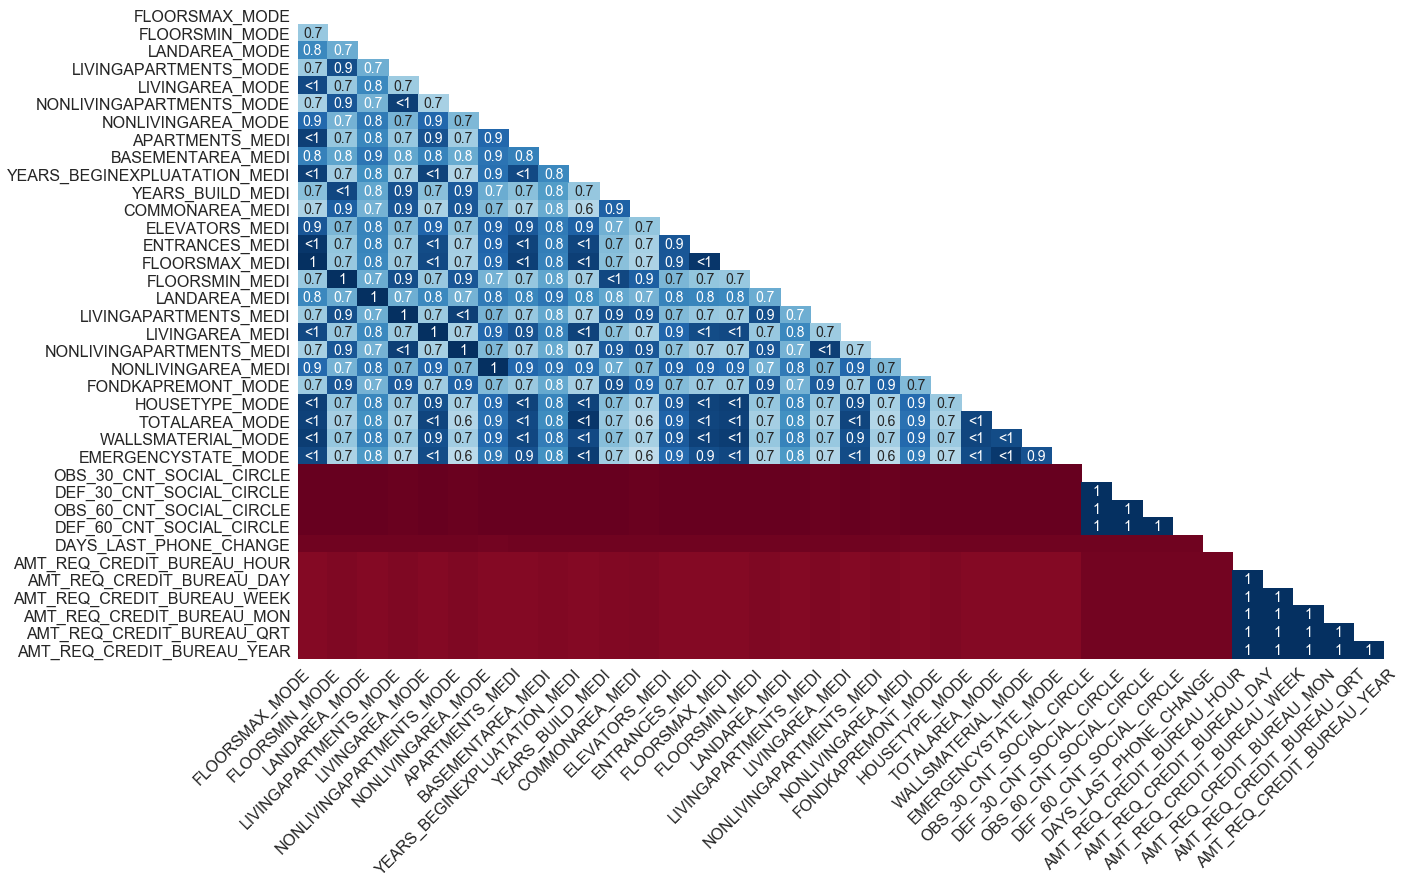

In [9]:
#Nullity correlation heatmap part 2
msno.heatmap(risk_data.iloc[0:, 65:])

It is evident from the data that a lot of housing information is null and are well correlated with features with housing information. So dropping these columns would me a huge loss of information. Feature generation from missing values, using algorithms that can handle missing values (xgb, lightgbm etc..) are potiential options. Moreover, converting catogorical varibles could present for an opportunity to include the missing values. So, lets revisit the missing values after encoding catogorical varibles.

## Encoding Categorical Features

In [10]:
#checking for constant features and an estimate of categorical
#`dropna = False` makes nunique treat NaNs as a distinct value
features_counts = risk_data.nunique(dropna = False)
features_counts.nsmallest(10)

TARGET                2
NAME_CONTRACT_TYPE    2
FLAG_OWN_CAR          2
FLAG_OWN_REALTY       2
FLAG_MOBIL            2
FLAG_EMP_PHONE        2
FLAG_WORK_PHONE       2
FLAG_CONT_MOBILE      2
FLAG_PHONE            2
FLAG_EMAIL            2
dtype: int64

In [11]:
#determining data types
from collections import Counter
Counter(risk_data.dtypes.values)

Counter({dtype('int64'): 41, dtype('float64'): 65, dtype('O'): 16})

In [12]:
#dividing columns so it'd be easier to look at one calss at a time - Divide and concur
obj_cols = list(risk_data.select_dtypes(include=['object']).columns)
int_cols = list(risk_data.select_dtypes(include=['int64']).columns)
float_cols = list(risk_data.select_dtypes(include=['float64']).columns)

In [13]:
#There are are XNA as well 
risk_data[obj_cols].isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [14]:
#filling nan to prep fro onehotencoding
for i in obj_cols:
    risk_data[i] = risk_data[i].fillna("{}_na".format(i))
print(risk_data[obj_cols].isnull().sum())

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
FONDKAPREMONT_MODE            0
HOUSETYPE_MODE                0
WALLSMATERIAL_MODE            0
EMERGENCYSTATE_MODE           0
dtype: int64


In [15]:
risk_data[obj_cols].nunique(dropna = False)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
WALLSMATERIAL_MODE             8
EMERGENCYSTATE_MODE            3
dtype: int64

In [16]:
set(risk_data.ORGANIZATION_TYPE),set(risk_data.OCCUPATION_TYPE) 

({'Advertising',
  'Agriculture',
  'Bank',
  'Business Entity Type 1',
  'Business Entity Type 2',
  'Business Entity Type 3',
  'Cleaning',
  'Construction',
  'Culture',
  'Electricity',
  'Emergency',
  'Government',
  'Hotel',
  'Housing',
  'Industry: type 1',
  'Industry: type 10',
  'Industry: type 11',
  'Industry: type 12',
  'Industry: type 13',
  'Industry: type 2',
  'Industry: type 3',
  'Industry: type 4',
  'Industry: type 5',
  'Industry: type 6',
  'Industry: type 7',
  'Industry: type 8',
  'Industry: type 9',
  'Insurance',
  'Kindergarten',
  'Legal Services',
  'Medicine',
  'Military',
  'Mobile',
  'Other',
  'Police',
  'Postal',
  'Realtor',
  'Religion',
  'Restaurant',
  'School',
  'Security',
  'Security Ministries',
  'Self-employed',
  'Services',
  'Telecom',
  'Trade: type 1',
  'Trade: type 2',
  'Trade: type 3',
  'Trade: type 4',
  'Trade: type 5',
  'Trade: type 6',
  'Trade: type 7',
  'Transport: type 1',
  'Transport: type 2',
  'Transport: type

Encoding would all these categorical features would mean adding sparse columns to the data. Especially, `ORGANIZATION_TYPE` and `OCCUPATION_TYPE` add 77 features collectively. While label encoding may seem attractive, it's not possible to label encode without making assumptions that may cause bias. Therefore, One-hot encoding or dummy encoding is the preferred choice. One-hot encoding is redundant, which allows for multiple valid models for the same problem. The non-uniqueness is sometimes problematic for interpretation, but the advantage is that each feature clearly corresponds to a category. Moreover, missing data can be encoded as the all-zeros vector, and the output should be the overall mean of the target variable. Dummy coding and effect coding are not redundant. They give rise to unique and interpretable models. The downside of dummy coding is that it cannot easily handle missing data, since the all-zeros vector is already mapped to the reference category. In this case, all the NaN are replaced by object so we can use dummy encoding.

In [17]:
risk_data = risk_data.join(pd.get_dummies(risk_data[obj_cols]))

In [18]:
risk_data = risk_data.drop(obj_cols,axis=1)

In [19]:
risk_data.shape

(307511, 252)

In [20]:
risk_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_WALLSMATERIAL_MODE_na,WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_EMERGENCYSTATE_MODE_na,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,1,0,0,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,1,0,1,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,1,0,1,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,1,0,1,0,0


 ## Integer columns: Missing values and Scaling

In [21]:
risk_data[int_cols].nunique(dropna = False).nlargest(50)

SK_ID_CURR                     307511
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
HOUR_APPR_PROCESS_START            24
CNT_CHILDREN                       15
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_6                     2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMEN

In [22]:
#No null in int columns!! - Less problems
risk_data[int_cols].isnull().sum().nlargest(50)

SK_ID_CURR                     0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_3                0
LIVE_CITY_NOT_WORK_CITY        0
TARGET                         0
REG_CITY_NOT_WORK_CITY         0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_

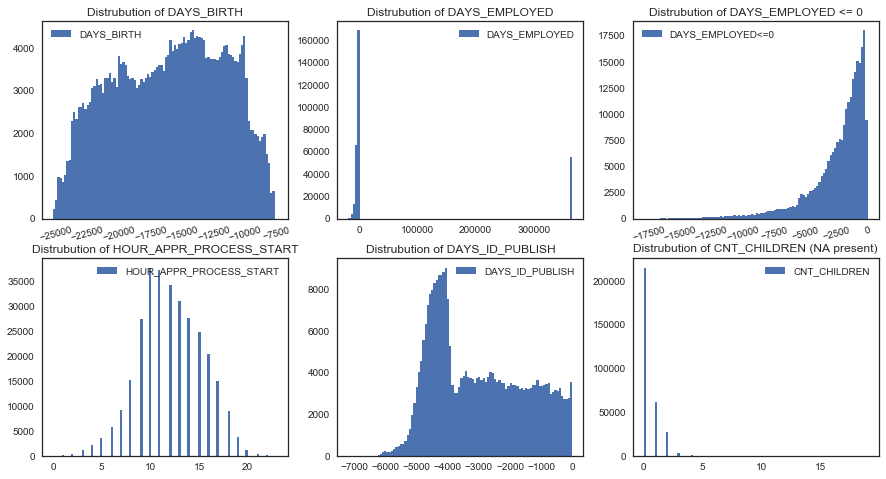

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(231)
plt.hist([risk_data.DAYS_BIRTH], bins=100,label=['DAYS_BIRTH'])  # arguments are passed to np.histogram
plt.title("Distrubution of DAYS_BIRTH")
plt.xticks(rotation = 15)
plt.legend()
plt.subplot(232)
plt.hist([risk_data.DAYS_EMPLOYED], bins=100,label=['DAYS_EMPLOYED'])  # arguments are passed to np.histogram
plt.title("Distrubution of DAYS_EMPLOYED")
plt.legend()
plt.subplot(233)
plt.hist(risk_data[risk_data.DAYS_EMPLOYED<=0].DAYS_EMPLOYED, bins=100,label=['DAYS_EMPLOYED<=0'])  # arguments are passed to np.histogram
plt.title("Distrubution of DAYS_EMPLOYED <= 0")
plt.xticks(rotation = 15)
plt.legend()
plt.subplot(234)
plt.hist([risk_data.HOUR_APPR_PROCESS_START], bins=100,label=['HOUR_APPR_PROCESS_START'])  # arguments are passed to np.histogram
plt.title("Distrubution of HOUR_APPR_PROCESS_START")
plt.legend()
plt.subplot(235)
plt.hist([risk_data.DAYS_ID_PUBLISH], bins=100,label=['DAYS_ID_PUBLISH'])  # arguments are passed to np.histogram
plt.title("Distrubution of DAYS_ID_PUBLISH")
plt.legend()
plt.subplot(236)
plt.hist([risk_data.CNT_CHILDREN.dropna()], bins=100,label=['CNT_CHILDREN'])  # arguments are passed to np.histogram
plt.title("Distrubution of CNT_CHILDREN (NA present)")
plt.legend()
plt.show()

-ve of day colums will give the no. of days according to the dataset. The reasoning I got it - "In general all predictors that start with prefix "Days_" were previously dates, but as we did not want to show from which time period the data is taken we converted the dates by showing the difference between the date and application date of each loan. The difference for events that happen in past are negative."

For `DAYS_EMPLOYED` - "Value 365243 denotes infinity in DAYS variables in the datasets, therefore you can consider them NA values. Also XNA/XAP denote NA values."

Imputing DAYS_EMPLOYED values by mean of DAYS_EMPLOYED by a Step seperation in DAYS_BIRTH

In [24]:
msng_Emp = risk_data[risk_data['DAYS_EMPLOYED']!=365243][['DAYS_BIRTH','DAYS_EMPLOYED']].copy()

In [25]:
msng_Emp['DAYS_BIRTH'] = msng_Emp['DAYS_BIRTH']/-356
msng_Emp['DAYS_EMPLOYED'] = msng_Emp['DAYS_EMPLOYED']/-356
msng_Emp['Ratio'] = msng_Emp['DAYS_EMPLOYED']/msng_Emp['DAYS_BIRTH']

In [26]:
max(msng_Emp.DAYS_BIRTH),min(msng_Emp.DAYS_BIRTH)

(70.786516853932582, 21.036516853932586)

In [27]:
Birth_Emp_ratio = list((msng_Emp[(msng_Emp['DAYS_BIRTH'] >= 20) &  (msng_Emp['DAYS_BIRTH'] < 30)].Ratio.mean(),
 msng_Emp[(msng_Emp['DAYS_BIRTH'] >= 30) &  (msng_Emp['DAYS_BIRTH'] < 40)].Ratio.mean(),
 msng_Emp[(msng_Emp['DAYS_BIRTH'] >= 40) &  (msng_Emp['DAYS_BIRTH'] < 50)].Ratio.mean(),
 msng_Emp[(msng_Emp['DAYS_BIRTH'] >= 50) &  (msng_Emp['DAYS_BIRTH'] < 60)].Ratio.mean(),
 msng_Emp[(msng_Emp['DAYS_BIRTH'] >= 60) ].Ratio.mean()))
    

In [28]:
Birth_Emp_ratio

[0.11424820894103485,
 0.1541206155736026,
 0.1681520658066118,
 0.17277851707913577,
 0.1833782369479317]

In [29]:
Days_missing = risk_data[(risk_data['DAYS_EMPLOYED']==365243)]['DAYS_BIRTH']/-365

In [30]:
Days_Birth = []
for i in Days_missing:
    if i >= 20.0 and i<30.0:
        Days_Birth.append(i*Birth_Emp_ratio[0])
    elif i >= 30.0 and i<40.0:
        Days_Birth.append(i*Birth_Emp_ratio[1])
    elif i >= 40.0 and i<50.0:
        Days_Birth.append(i*Birth_Emp_ratio[2])
    elif i >= 50.0 and i<60.0:
        Days_Birth.append(i*Birth_Emp_ratio[3])
    elif i >= 60.0:
        Days_Birth.append(i*Birth_Emp_ratio[4])

In [31]:
len(Days_Birth)

55374

In [32]:
risk_data['DAYS_EMPLOYED']  = risk_data['DAYS_EMPLOYED'].replace(365243,np.nan)

In [33]:
risk_data.loc[risk_data['DAYS_EMPLOYED'].isnull(),'DAYS_EMPLOYED'] = [i*-365 for i in Days_Birth]

In [34]:
risk_data['DAYS_EMPLOYED'].isnull().sum()

0

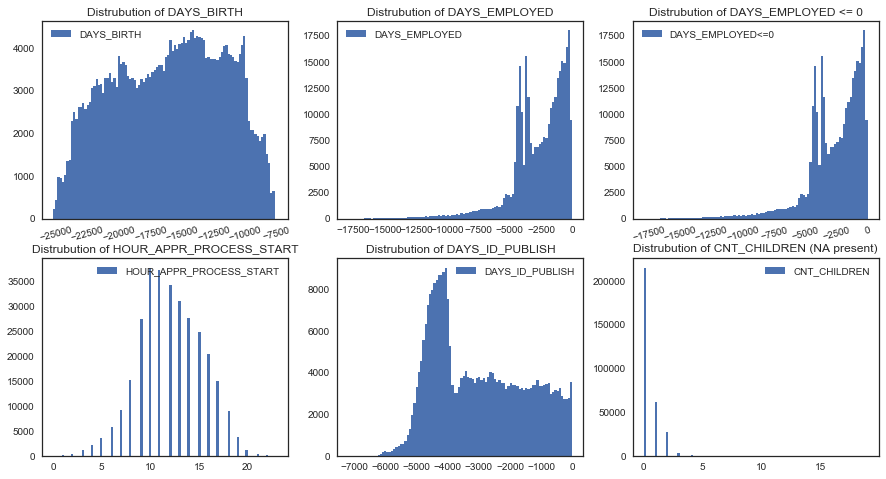

In [35]:
plt.figure(figsize=(15,8))
plt.subplot(231)
plt.hist([risk_data.DAYS_BIRTH], bins=100,label=['DAYS_BIRTH'])  # arguments are passed to np.histogram
plt.title("Distrubution of DAYS_BIRTH")
plt.xticks(rotation = 15)
plt.legend()
plt.subplot(232)
plt.hist([risk_data.DAYS_EMPLOYED], bins=100,label=['DAYS_EMPLOYED'])  # arguments are passed to np.histogram
plt.title("Distrubution of DAYS_EMPLOYED")
plt.legend()
plt.subplot(233)
plt.hist(risk_data[risk_data.DAYS_EMPLOYED<=0].DAYS_EMPLOYED, bins=100,label=['DAYS_EMPLOYED<=0'])  # arguments are passed to np.histogram
plt.title("Distrubution of DAYS_EMPLOYED <= 0")
plt.xticks(rotation = 15)
plt.legend()
plt.subplot(234)
plt.hist([risk_data.HOUR_APPR_PROCESS_START], bins=100,label=['HOUR_APPR_PROCESS_START'])  # arguments are passed to np.histogram
plt.title("Distrubution of HOUR_APPR_PROCESS_START")
plt.legend()
plt.subplot(235)
plt.hist([risk_data.DAYS_ID_PUBLISH], bins=100,label=['DAYS_ID_PUBLISH'])  # arguments are passed to np.histogram
plt.title("Distrubution of DAYS_ID_PUBLISH")
plt.legend()
plt.subplot(236)
plt.hist([risk_data.CNT_CHILDREN.dropna()], bins=100,label=['CNT_CHILDREN'])  # arguments are passed to np.histogram
plt.title("Distrubution of CNT_CHILDREN (NA present)")
plt.legend()
plt.show()

# using trees so we can process with missing and unscaled date
XGboost works on missing data and therefore allows us to proceede with out imputing or removing missing values.